In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


# PseudoCode and Task List

1. Load the pickled pandas dataframe from 03 notebook 
2. Examine contents to assure everything transferred properly - no issues found
3. Analyze length of body (both characters and words) against other features and id any correlations
4. Analyze number of question marks against other features and id any correlations
5. Analyze text bolding against other features and id any correlations
6. Analyze # of paragraphs against other features and id any correlations
7. Analyze # of code examples and length of those examples and id any correlations
8. Analyze NER results against tags for correlations
9. Remove unnecessary columns and empty rows and export - next step is count vectorization


# Tasks 1 and 2 Load file and examine contents

In [ ]:
'''
Import all modules that are needed
'''
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from collections import defaultdict 
import re

In [ ]:
'''
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24353 entries, 0 to 24352
Data columns (total 63 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Id                    24353 non-null  int64          
 1   PostTypeId            24353 non-null  int64          
 2   CreationDate          24353 non-null  datetime64[ns] 
 3   Score                 24353 non-null  int64          
 4   ViewCount             24353 non-null  int64          
 5   Body                  24353 non-null  object         
 6   OwnerUserId           24238 non-null  object         
 7   LastActivityDate      24353 non-null  datetime64[ns] 
 8   Title                 24353 non-null  object         
 9   Tags                  24353 non-null  object         
 10  AnswerCount           24353 non-null  int64          
 11  CommentCount          24353 non-null  int64          
 12  FavoriteCount         6708 non-null   object         
 13  ClosedDate            1416 non-null   datetime64[ns] 
 14  ContentLicense        24353 non-null  object         
 15  Tags_SpaceDelimited   24353 non-null  object         
 16  Tags_Clean            24353 non-null  object         
 17  TagCount              24353 non-null  int64          
 18  Tag1                  24353 non-null  object         
 19  Tag2                  21064 non-null  object         
 20  Tag3                  15037 non-null  object         
 21  Tag4                  8302 non-null   object         
 22  Tag5                  3687 non-null   object         
 23  Tag1_Freq             24353 non-null  int64          
 24  Tag2_Freq             21064 non-null  float64        
 25  Tag3_Freq             15037 non-null  float64        
 26  Tag4_Freq             8302 non-null   float64        
 27  Tag5_Freq             3687 non-null   float64        
 28  Total_Tag_Freqency    24353 non-null  float64        
 29  Tag1_Renamed          24353 non-null  object         
 30  Tag2_Renamed          24353 non-null  object         
 31  Tag3_Renamed          24353 non-null  object         
 32  Tag4_Renamed          24353 non-null  object         
 33  Tag5_Renamed          24353 non-null  object         
 34  TopTag                24353 non-null  category       
 35  Elapsed_Time          24353 non-null  timedelta64[ns]
 36  Elapsed_Time_Int      24353 non-null  int16          
 37  rank                  24353 non-null  int64          
 38  Tag1_Renamed2         24353 non-null  object         
 39  TopTag_Revised        24353 non-null  int64          
 40  NumQuestions          24353 non-null  int64          
 41  BodyBoldCount         24353 non-null  int64          
 42  ParagraphCount        24353 non-null  int64          
 43  CodeCount             24353 non-null  int64          
 44  Soup                  24353 non-null  object         
 45  NoCode                24353 non-null  object         
 46  NoCodeString          24353 non-null  object         
 47  BodyText              24353 non-null  object         
 48  bodytext_expanded     24353 non-null  object         
 49  lang                  24353 non-null  object         
 50  punct_only            24353 non-null  object         
 51  bodytext_noaccents    24353 non-null  object         
 52  bodytext_nospch       24353 non-null  object         
 53  temp                  24353 non-null  object         
 54  temp2                 24353 non-null  object         
 55  temp3                 24353 non-null  object         
 56  BodyText_Lemma        24353 non-null  object         
 57  NER                   24353 non-null  object         
 58  NER_text              24353 non-null  object         
 59  NER_label             24353 non-null  object         
 60  bodytext_nouns        24353 non-null  object         
 61  bodytext_lc           24353 non-null  object         
 62  BodyText_NoStopwords  24353 non-null  object         
dtypes: category(1), datetime64[ns](3), float64(5), int16(1), int64(14), object(38), timedelta64[ns](1)
memory usage: 11.6+ MB 
'''

questions_df = pd.read_pickle('/content/drive/My Drive/Capstone2/Data/questions_df_ner_results_10282020.pickle')

questions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24353 entries, 0 to 24352
Data columns (total 63 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Id                    24353 non-null  int64          
 1   PostTypeId            24353 non-null  int64          
 2   CreationDate          24353 non-null  datetime64[ns] 
 3   Score                 24353 non-null  int64          
 4   ViewCount             24353 non-null  int64          
 5   Body                  24353 non-null  object         
 6   OwnerUserId           24238 non-null  object         
 7   LastActivityDate      24353 non-null  datetime64[ns] 
 8   Title                 24353 non-null  object         
 9   Tags                  24353 non-null  object         
 10  AnswerCount           24353 non-null  int64          
 11  CommentCount          24353 non-null  int64          
 12  FavoriteCount         6708 non-null   object         
 13  C

In [ ]:
'''
2. Examine contents
'''
questions_df.head()

,Id,PostTypeId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,ContentLicense,Tags_SpaceDelimited,Tags_Clean,TagCount,Tag1,Tag2,Tag3,Tag4,Tag5,Tag1_Freq,Tag2_Freq,Tag3_Freq,Tag4_Freq,Tag5_Freq,Total_Tag_Freqency,Tag1_Renamed,Tag2_Renamed,Tag3_Renamed,Tag4_Renamed,Tag5_Renamed,TopTag,Elapsed_Time,Elapsed_Time_Int,rank,Tag1_Renamed2,TopTag_Revised,NumQuestions,BodyBoldCount,ParagraphCount,CodeCount,Soup,NoCode,NoCodeString,BodyText,bodytext_expanded,lang,punct_only,bodytext_noaccents,bodytext_nospch,temp,temp2,temp3,BodyText_Lemma,NER,NER_text,NER_label,bodytext_nouns,bodytext_lc,BodyText_NoStopwords
0,5,1,2014-05-13 23:58:30.457,9,708,<p>I've always been interested in machine lear...,5,2014-05-14 00:36:31.077,How can I do simple machine learning without h...,<machine-learning>,1,1,1,2014-05-14 14:40:25.950,CC BY-SA 3.0,machine-learning,[machine-learning],1,machine-learning,NaN,NaN,NaN,NaN,7766,NaN,NaN,NaN,NaN,7766.0,machine-learning,NaN,NaN,NaN,NaN,1,0 days 00:38:00.620000,0,21642,machine-learning,1,2,0,3,0,[[[<p>I've always been interested in machine l...,[[[<p>I've always been interested in machine l...,<html><body><p>I've always been interested in ...,I've always been interested in machine learnin...,I have always been interested in machine learn...,en,", "" "" - - ? , "" "" , , , , , , . , , ?",I have always been interested in machine learn...,I have always been interested in machine learn...,I have always be interest in machine learn but...,I have always be interest in machine learn but...,I have always be interest in machine learn but...,I have always be interest in machine learn but...,"[[one, CARDINAL], [Hello World, ORG]]","[[one], [Hello World]]","[[CARDINAL], [ORG]]","[interest, machine, learn, thing, start, Hello...",i have always be interest in machine learn but...,always interest machine learn figure one thing...
1,7,1,2014-05-14 00:11:06.457,4,441,"<p>As a researcher and instructor, I'm looking...",36,2014-05-16 13:45:00.237,What open-source books (or other materials) pr...,<education><open-source>,3,4,1,2014-05-14 08:40:54.950,CC BY-SA 3.0,education open-source,"[education, open-source]",2,education,open-source,NaN,NaN,NaN,33,16.0,NaN,NaN,NaN,49.0,Other,Other,NaN,NaN,NaN,0,2 days 13:33:53.780000,2,16792,Other,0,0,0,1,0,"[[[<p>As a researcher and instructor, I'm look...","[[[<p>As a researcher and instructor, I'm look...","<html><body><p>As a researcher and instructor,...","As a researcher and instructor, I'm looking fo...","As a researcher and instructor, I am looking f...",en,", - ( ) . , - , .","As a researcher and instructor, I am looking f...",As a researcher and instructor I am looking fo...,As a researcher and instructor I be look for o...,As a researcher and instructor I be look for o...,As a researcher and instructor I be look for o...,As a researcher and instructor I be look for o...,[],[],[],"[researcher, instructor, opensource, book, mat...",as a researcher and instructor i be look for o...,researcher instructor look opensource book sim...
2,14,1,2014-05-14 01:25:59.677,22,1717,<p>I am sure data science as will be discussed...,66,2014-06-20 17:36:05.023,Is Data Science the Same as Data Mining?,<data-mining><definitions>,4,1,6,NaT,CC BY-SA 3.0,data-mining definitions,"[data-mining, definitions]",2,data-mining,definitions,NaN,NaN,NaN,1005,31.0,NaN,NaN,NaN,1036.0,data-mining,Other,NaN,NaN,NaN,1,37 days 16:10:05.346000,37,15799,data-mining,1,1,0,2,0,[[[<p>I am sure data science as will be discus...,[[[<p>I am sure data science as will be discus...,<html><body><p>I am sure data science as will ...,I am sure data science as will be discussed in...,I am sure data science as will be discussed in...,en,. . . ?,I am sure data science as will be discussed in...,I am sure data science as will be discussed in...,I be sure data science as will be discuss in t...,I be sure data science a will be discus in thi...,I be sure data science a will

# Tasks 3-7 - Feature Analysis
3. Analyze length of body (both characters and words) against other features and id any correlations
4. Analyze number of question marks against other features and id any correlations
5. Analyze text bolding against other features and id any correlations
6. Analyze # of paragraphs against other features and id any correlations
7. Analyze # of code examples and length of those examples and id any correlations

In [ ]:
'''
3. Analyze number of characters, number of words, and number of unique words in each question versus tagcount, viewcount, score
3a.  First get the counts and look at summary stats
Average Unique Word Count per question is 43 with a minimum of 1 and max of 490
Average Word count per question is 62 with a minimum of 1 and max of 1116
Average character count per question is 365 with a min of 0 and max of 16419
Whats up with the minimums - let's have a look at those - there are 26 and in these cases the text normalization has decreased
the significant words used to just blanks or to one word
'''
# Getting the # of characters of each question:
questions_df['BodyText_ChCount'] = questions_df['BodyText_NoStopwords'].str.len() - questions_df['BodyText_NoStopwords'].str.count(" ")
#questions_df.head()

# Getting the # of words of each question:
questions_df['BodyText_WordCount'] = questions_df['BodyText_NoStopwords'].str.split(" ").str.len()
#questions_df.head()

# Getting the # of unique words of each question:

def uniqueword_count(x):
  d = defaultdict(int) 
  for word in x: 
	  d[word] += 1
  return len(d)
questions_df['BodyText_UnWordCount'] = questions_df['BodyText_NoStopwords'].str.split(" ").apply(uniqueword_count)    

# Summary statistics of the these features
print(questions_df[['BodyText_ChCount','BodyText_WordCount','BodyText_UnWordCount']].describe())

#Viewing minimum
#questions_df.loc[questions_df['BodyText_WordCount']==1].head(26)
print(questions_df['BodyText_UnWordCount'].median())
print(questions_df['BodyText_WordCount'].median())
print(questions_df['BodyText_ChCount'].median())

       BodyText_ChCount  BodyText_WordCount  BodyText_UnWordCount
count      24353.000000        24353.000000          24353.000000
mean         365.520306           61.521455             43.613764
std          303.665229           48.089093             27.918232
min            0.000000            1.000000              1.000000
25%          179.000000           30.000000             24.000000
50%          293.000000           50.000000             37.000000
75%          463.000000           78.000000             56.000000
max        16419.000000         1166.000000            490.000000
37.0
50.0
293.0


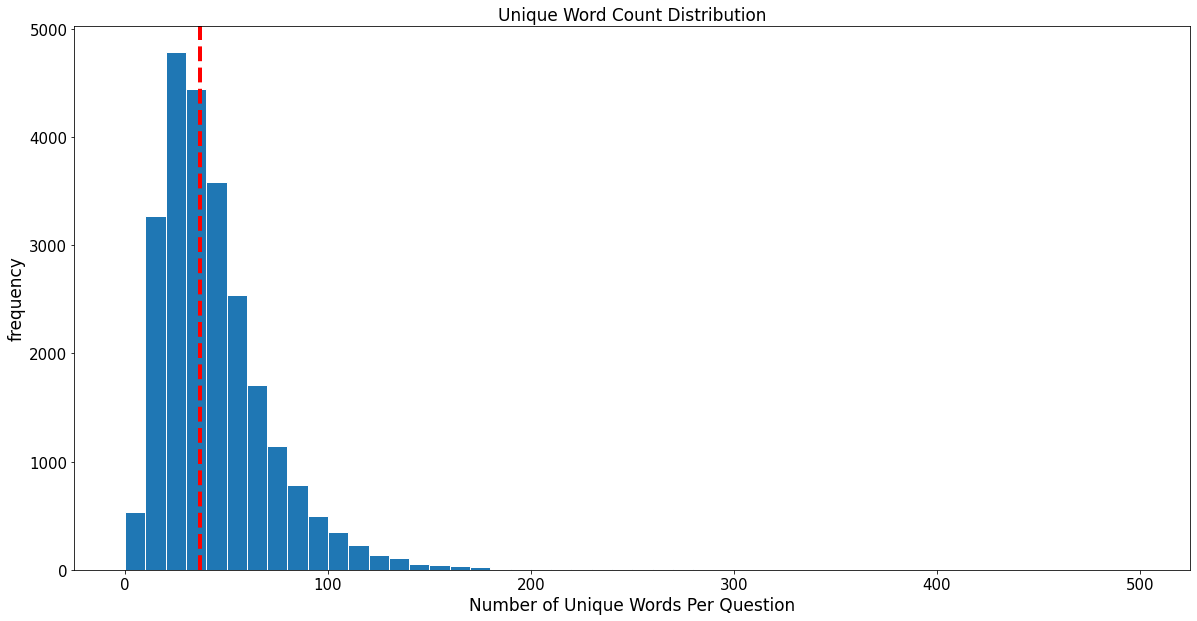

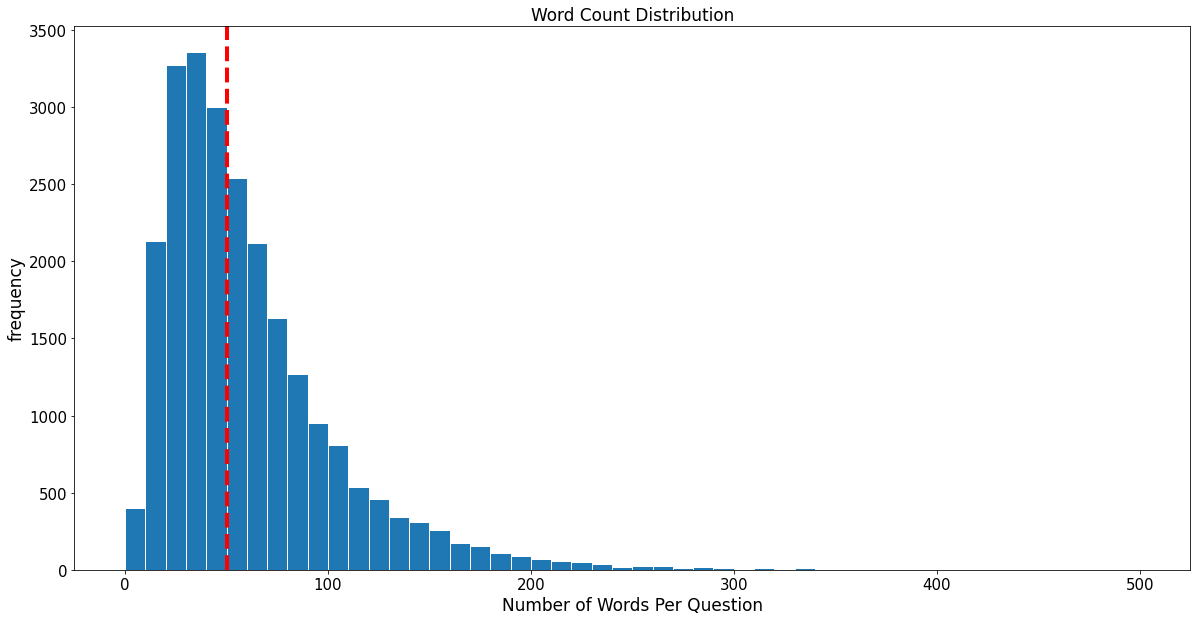

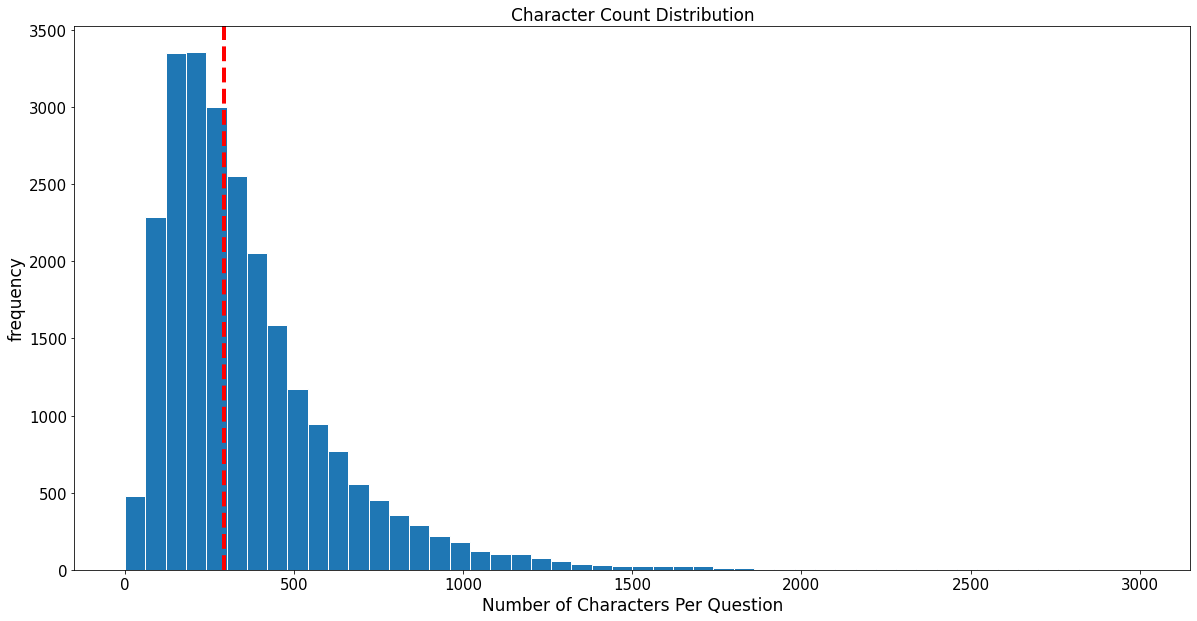

In [ ]:
'''
3b. Visualizations of the distributions of these 3 new features

All have skewed (poisson) distributions as would be expected from counts statistics
Median is a better parameter for average - 37, 50 and 293 respectively
'''
questions_df['BodyText_UnWordCount'].plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,500])
plt.axvline(questions_df['BodyText_UnWordCount'].median(), color = 'r', linestyle = 'dashed', linewidth = 4)
plt.xlabel('Number of Unique Words Per Question', fontsize=17)
plt.ylabel('frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Unique Word Count Distribution', fontsize=17)
plt.show()

questions_df['BodyText_WordCount'].plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,500])
plt.axvline(questions_df['BodyText_WordCount'].median(), color = 'r', linestyle = 'dashed', linewidth = 4)
plt.xlabel('Number of Words Per Question', fontsize=17)
plt.ylabel('frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Word Count Distribution', fontsize=17)
plt.show()

questions_df['BodyText_ChCount'].plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,3000])
plt.axvline(questions_df['BodyText_ChCount'].median(), color = 'r', linestyle = 'dashed', linewidth = 4)
plt.xlabel('Number of Characters Per Question', fontsize=17)
plt.ylabel('frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Character Count Distribution', fontsize=17)
plt.show()

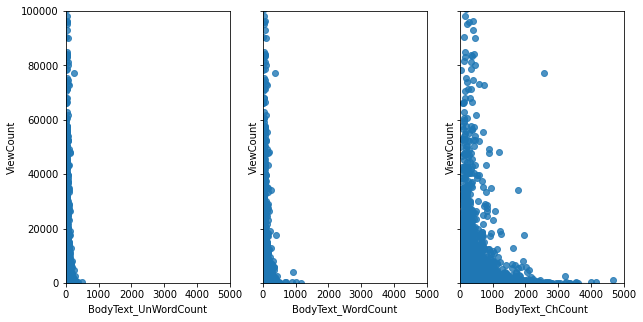

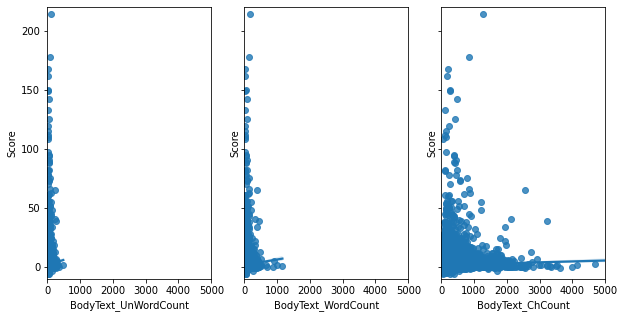

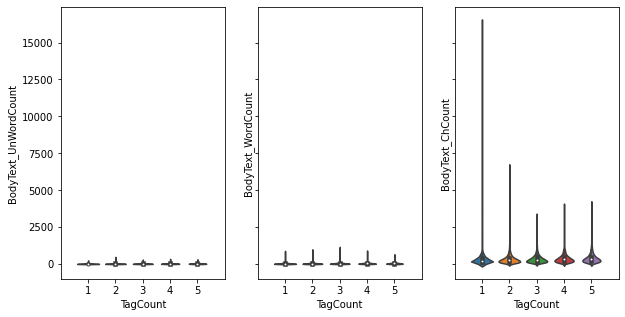

In [ ]:
'''
3c. Analyze number of characters and number of words and unique words in each question versus viewcount, tagcount, and score
with both Scatter and Violin plots using seaborn library
Looks like both viewcounts and score are inversely correlated to both character and word counts; no relationship observed
between these and tag counts
'''
# Unique Word Count, Word Count and Char Count  vs ViewCount
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, sharey=True, sharex = True, figsize=(10,5))

sns.regplot(x = 'BodyText_UnWordCount', y = 'ViewCount', data=questions_df, ax=ax0)
sns.regplot(x = 'BodyText_WordCount', y = 'ViewCount', data=questions_df, ax=ax1)
sns.regplot(x = 'BodyText_ChCount', y = 'ViewCount', data=questions_df, ax=ax2)
plt.ylabel('ViewCount')
plt.xlim(0,5000)
plt.ylim(0,100000)
plt.show()

# Unique Word Count, Word Count and Char Count  vs Score
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, sharey=True, sharex = True, figsize=(10,5))

sns.regplot(x = 'BodyText_UnWordCount', y = 'Score', data=questions_df, ax=ax0)
sns.regplot(x = 'BodyText_WordCount', y = 'Score', data=questions_df, ax=ax1)
sns.regplot(x = 'BodyText_ChCount', y = 'Score', data=questions_df, ax=ax2)
plt.ylabel('Score')
plt.xlim(0,5000)
plt.ylim(-10,220)
plt.show()

# TagCount vs Unique Word Count, Word Count and Character Count
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, sharey=True, sharex = True, figsize=(10,5))

sns.violinplot(x = 'TagCount', y = 'BodyText_UnWordCount', data=questions_df, ax=ax0)
sns.violinplot(x = 'TagCount', y = 'BodyText_WordCount', data=questions_df, ax=ax1)
sns.violinplot(x = 'TagCount', y = 'BodyText_ChCount', data=questions_df, ax=ax2)
plt.xlabel('TagCount')
plt.xlim(-1,5)
plt.show()


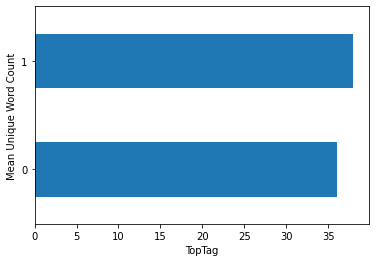

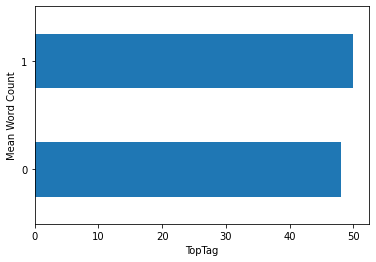

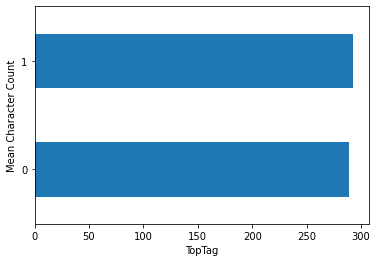

In [ ]:
'''
3d. Lastly, analyze number of characters and number of words and unique words in each question versus whether they are TopTags or not
in other words, do the questions with higher ranked tags have any kind of correlation to their length?
Use the TopTag flag created earlier
Very weak positive correlation between the number of words, unique words, and the Top Tags
'''
toptags_unwordcount = questions_df.groupby("TopTag_Revised")['BodyText_UnWordCount'].median()
toptags_unwordcount.plot.barh()
plt.xlabel("TopTag")
plt.ylabel("Mean Unique Word Count")
plt.show()

toptags_wordcount = questions_df.groupby("TopTag_Revised")["BodyText_WordCount"].median()
toptags_wordcount.plot.barh()
plt.xlabel("TopTag")
plt.ylabel("Mean Word Count")
plt.show()

toptags_chcount = questions_df.groupby("TopTag_Revised")["BodyText_ChCount"].median()
toptags_chcount.plot.barh()
plt.xlabel("TopTag")
plt.ylabel("Mean Character Count")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

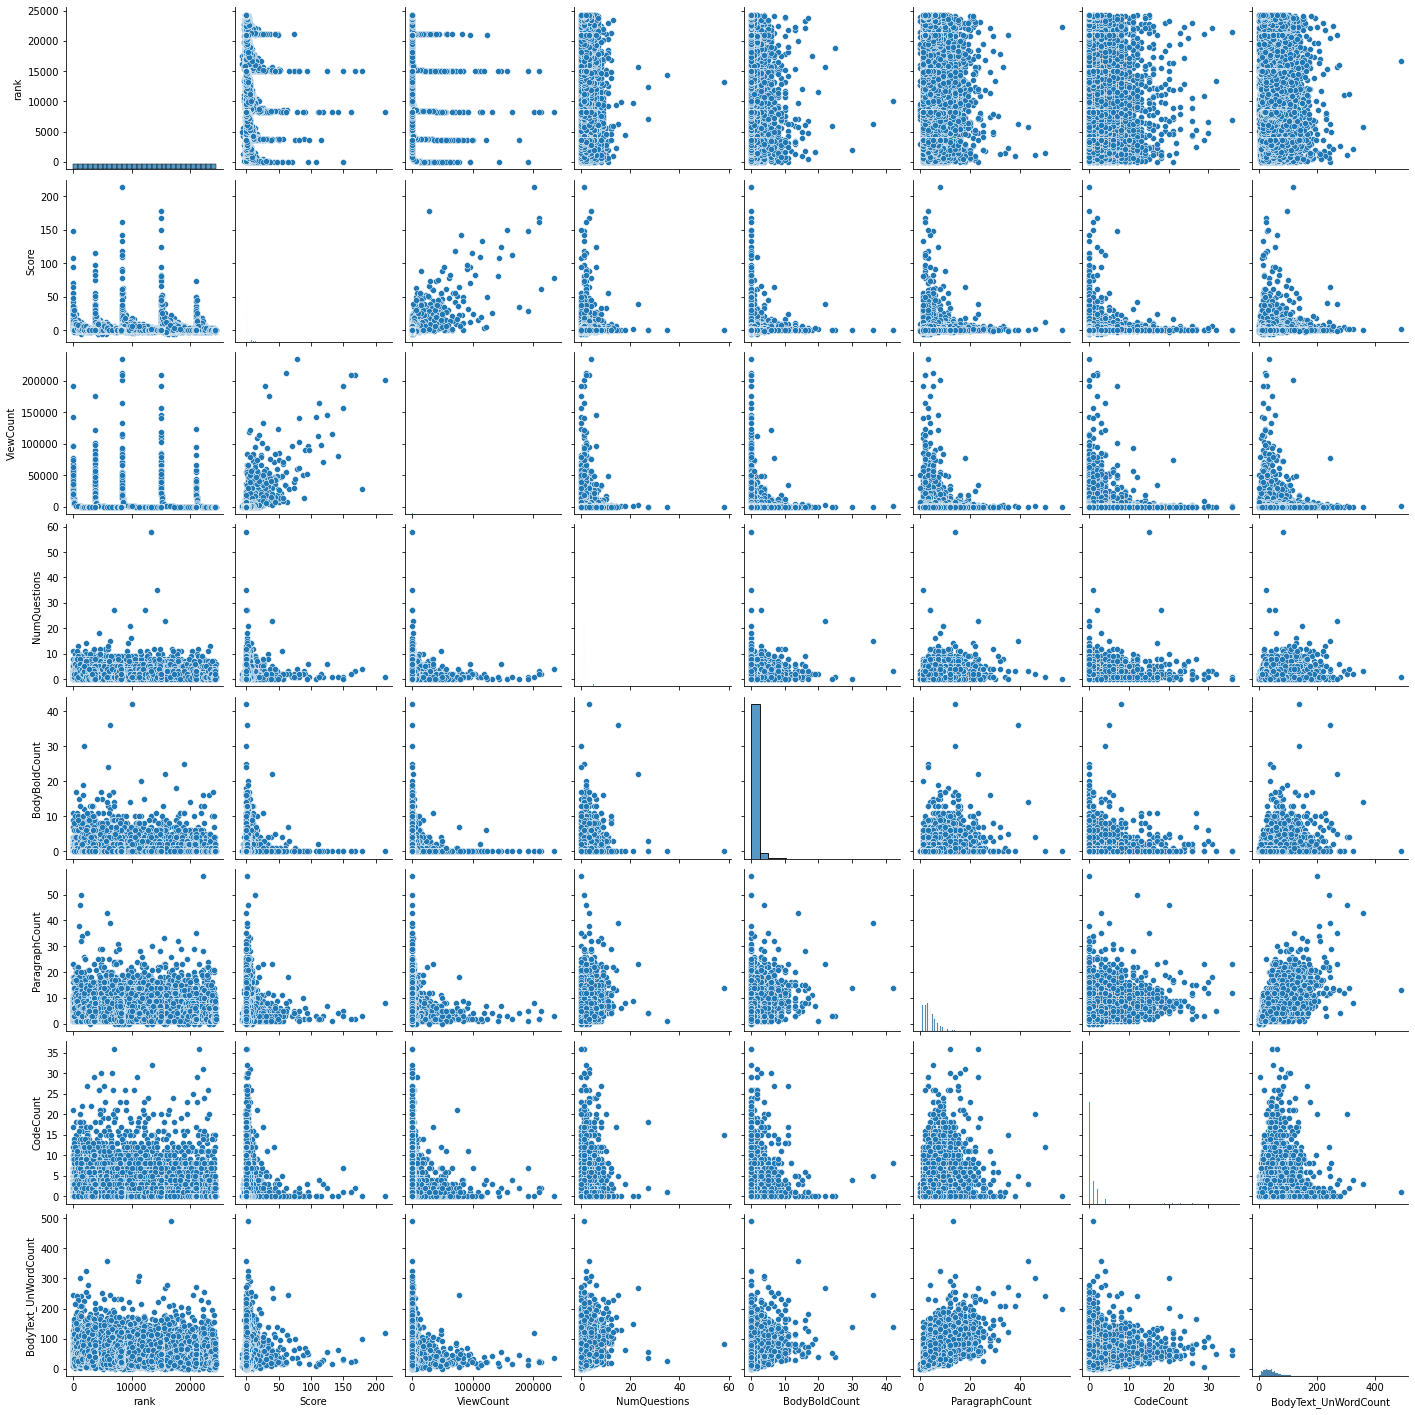

In [ ]:
'''
4,5,6,7 - looking at features created earlier that may be of significance - Questions Counts, Paragraph Counts, Bold Counts, Code Counts
Need to also look at Score, View Count, etc by elapsed time
maybe an sns pairplot is in order, but first let's limit the features to plot
looks like there are a lot of inverse correlations; for instance when a lot of questions are asked, the bold count, and paragraph counts
go down, as well as the body word count; this may speak to different styles of the question askers;
some are big questions askers, other are big on code examples, or bolding text for emphasis, but they tend to fit in
separate categories or perhaps are related more specifically to tag topics.
'''
questions_df_pairplot = questions_df[["rank","Score","ViewCount","TopTag_Revised","NumQuestions","BodyBoldCount","ParagraphCount","CodeCount",\
                                      "BodyText_UnWordCount"]]                                     
#questions_df_pairplot["Tag_Count_Int"] = questions_df_pairplot['TagCount'].astype('int')
questions_df_pairplot["TopTag_Temp"] = questions_df_pairplot['TopTag_Revised'].astype('category')
questions_df_pairplot["TopTag"] = questions_df_pairplot["TopTag_Temp"].cat.as_ordered()
questions_df_pairplot.drop(axis=1, columns = ["TopTag_Temp","TopTag_Revised"], inplace = True)
#questions_df_pairplot.info()
sns.pairplot(data=questions_df_pairplot)

# Task 8 - Analyze question words by tag - more will be done after count vectorization and tf-idf in next notebook
>8a.Visualize question frequency by the 33 tags.
>8b.Identify average word count per tag.

[Text(0, 0.5, 'Question Frequency'), Text(0.5, 0, 'Tag Name')]

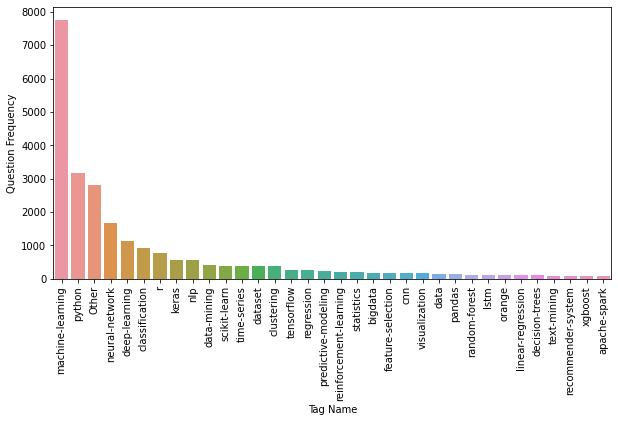

In [ ]:
'''
8a getting question frequency by 33 tags; you can see dataset does not have equal counts of each tag - with ML, python, neural-network, deep-learning, classification, and r 
being the top 6 (other category are those not top tags - combined into one grouping)
'''
questionsfreq_bytag = questions_df[['Tag1_Renamed2',"BodyText_WordCount"]].groupby(['Tag1_Renamed2'],as_index=False).count().sort_values(["BodyText_WordCount"], ascending=False)
#questionsfreq_bytag.head()
# Visualizing question frequency by tag
fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(rotation=90)
ax = sns.barplot(x="Tag1_Renamed2", y="BodyText_WordCount", data=questionsfreq_bytag)
ax.set(xlabel='Tag Name', ylabel='Question Frequency')

[Text(0, 0.5, 'Median Words Per Tag'), Text(0.5, 0, 'Tag Name')]

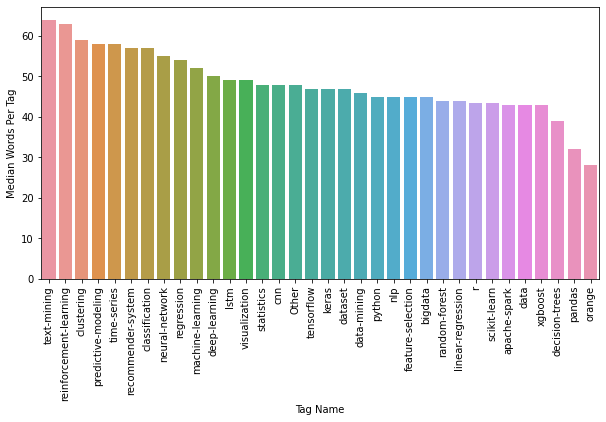

In [ ]:
'''
8a Visualize average word count by tag; note programming related python and r tags are on lower end of word counts likely because we have removed more core in these questions; 
text mining and reinforcement learning has the highest mean word count
'''
avgwordcount_bytag = questions_df[['Tag1_Renamed2',"BodyText_WordCount"]].groupby(['Tag1_Renamed2'],as_index=False).median().sort_values(["BodyText_WordCount"], ascending=False)
avgwordcount_bytag.head()
# Visualizing question frequency by tag
fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(rotation=90)
ax = sns.barplot(x="Tag1_Renamed2", y="BodyText_WordCount", data=avgwordcount_bytag)
ax.set(xlabel='Tag Name', ylabel='Median Words Per Tag')

# Task 9 - Analysis of NER results by tag

In [ ]:
'''
9a. Let's get a list of all the Named Entities and Their Frequency Counts and save to a new dataframe; really need to filter out
numerics and alphanumeric numerals to get a good analysis
'''
questions_df['NER_txt_str'] = [', '.join(item for sublist in x for item in sublist) for x in questions_df['NER_text']]
#questions_df.head(5)
def separate_ner_text(text):
    return text.split(",")

questions_df['NER_txt_str2'] = questions_df['NER_txt_str'].apply(lambda y: separate_ner_text(y))
#questions_df.head(5)
all_ner_text = [item for sublist in questions_df['NER_txt_str2'].values for item in sublist]
#print(all_ner_text)

my_set = set(all_ner_text)
unique_ner_text = list(my_set)

ner_name_freq = collections.Counter(all_ner_text)

kk=[list(ner_name_freq.keys()),list(ner_name_freq.values())]

ner_name_freq_df = pd.DataFrame(np.array(kk).T, columns=['NERText','NERText_Freq'])
ner_name_freq_df['NERText_Freq'] = pd.to_numeric(ner_name_freq_df['NERText_Freq'])

# Using this code to make the output clear
print("There are a total of {} named entitites in this dataset. \n".format(len(all_ner_text)))

print("There are {} unique named entities in this dataset. \n".format(len(unique_ner_text)))

print("Here is a list of the top 50 named entities sorted by frequency: \n")
ner_name_freq_df.sort_values(by='NERText_Freq', ascending = False).head(50)

There are a total of 117904 named entitites in this dataset. 

There are 31896 unique named entities in this dataset. 

Here is a list of the top 50 named entities sorted by frequency: 



,NERText,NERText_Freq
97,1,4363
16,one,3520
2,,3240
34,two,2835
246,2,2821
38,first,2588
17,3,1852
36,second,1234
191,10,1218
196,0,1201


# Task 10 Clean up and Export Results

In [ ]:
'''
10. Filter dataframe to just the columns needed for count vectorization and rename them 
'''
questions_df_clean = questions_df[['Id','Tag1_Renamed2','BodyText_NoStopwords']]
questions_df_clean.rename(columns={"Tag1_Renamed2": "Tag", "BodyText_NoStopwords": "BodyText_Clean"},inplace='True')
questions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24353 entries, 0 to 24352
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              24353 non-null  int64 
 1   Tag             24353 non-null  object
 2   BodyText_Clean  24353 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
'''
10. Remove single numerics
'''
questions_df_clean['BodyText_Clean'] = questions_df_clean['BodyText_Clean'].apply(lambda x: re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
'''
10. Locate, count, and removing empty BodyText_Clean rows
'''
questions_df_clean['BodyText_Ch_Count'] = questions_df_clean['BodyText_Clean'].str.len() - questions_df_clean['BodyText_Clean'].str.count(" ")
#questions_df_clean.loc[questions_df_clean['BodyText_Ch_Count'] == 0]
questions_df_clean.drop(questions_df_clean[questions_df_clean['BodyText_Ch_Count'] == 0].index, inplace = True) 
#questions_df_clean.loc[questions_df_clean['BodyText_Ch_Count'] == 0]
questions_df_clean.drop('BodyText_Ch_Count', axis=1, inplace=True)

questions_df_clean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Id,Tag,BodyText_Clean
0,5,machine-learning,always interest machine learn figure one thing...
1,7,Other,researcher instructor look opensource book sim...
2,14,data-mining,sure data science discus forum several synonym...
3,15,Other,situation would one system prefer relative adv...
4,16,machine-learning,use libsvm train data predict classification s...


In [ ]:
'''
12. We have cleaned up the dataframe in prep for count vectorization.
Now write out for safekeeping
'''
pickle_out = open("/content/drive/My Drive/Capstone2/Data/questions_df_clean_11052020.pickle","wb")
pickle.dump(questions_df_clean, pickle_out, protocol=pickle.HIGHEST_PROTOCOL)
pickle_out.close()

In [ ]:
# 10. Also export out the full dataframe for archival

#import sys
#print(sys.getrecursionlimit())
#sys.setrecursionlimit(2000)
#print(sys.getrecursionlimit())
#pickle_out = open("/content/drive/My Drive/Capstone2/Data/questions_df_all.pickle","wb")
#pickle.dump(questions_df, pickle_out, protocol=pickle.HIGHEST_PROTOCOL)
#pickle_out.close()
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24353 entries, 0 to 24352
Data columns (total 68 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Id                    24353 non-null  int64          
 1   PostTypeId            24353 non-null  int64          
 2   CreationDate          24353 non-null  datetime64[ns] 
 3   Score                 24353 non-null  int64          
 4   ViewCount             24353 non-null  int64          
 5   Body                  24353 non-null  object         
 6   OwnerUserId           24238 non-null  object         
 7   LastActivityDate      24353 non-null  datetime64[ns] 
 8   Title                 24353 non-null  object         
 9   Tags                  24353 non-null  object         
 10  AnswerCount           24353 non-null  int64          
 11  CommentCount          24353 non-null  int64          
 12  FavoriteCount         6708 non-null   object         
 13  C